In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import os
TOPOS=["topo1", "topo2", "topo3"]
#TOPOS=["topo4"]
SCHED=["ecf", "rtt", "rr"]
SIZE=["1","10","50"]
REP=5


In [12]:
password = "ejogarv123"

for t in TOPOS:
    for s in SCHED:
        for d in SIZE:
            command = "sudo -S python3 ./runner.py -t {topo}.yaml -x {sched}.{size}.yaml -o {topo}-{sched}-{size}".format(topo=t, sched=s, size=d)
            os.system('echo %s | %s' % (password, command))


[sudo] password for ejogarv: 

 RUST_LOG=info ./mpquic-quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ./mpquic-quiche/src/bin/cert.crt --key ./mpquic-quiche/src/bin/cert.key --root ./ --scheduler ecf --path-stats-output topo4-ecf/path-0.csv --conn-stats-output topo4-ecf/conn-0.csv --sched-stats-output topo4-ecf/ecf-0.csv > topo4-ecf/server0.log&
 RUST_LOG=info ./mpquic-quiche/target/debug/mp_client -l 10.0.1.1:5555 -w 10.0.2.1:6666 --url https://10.0.3.10:4433/test.bin --download-stats-output topo4-ecf/download-0.csv --path-stats-output topo4-ecf/client-0.csv > topo4-ecf/client0.log
 RUST_LOG=info ./mpquic-quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ./mpquic-quiche/src/bin/cert.crt --key ./mpquic-quiche/src/bin/cert.key --root ./ --scheduler ecf --path-stats-output topo4-ecf/path-1.csv --conn-stats-output topo4-ecf/conn-1.csv --sched-stats-output topo4-ecf/ecf-1.csv > topo4-ecf/server1.log&
 RUST_LOG=info ./mpquic-quiche/target/debug/mp_client -l 10.0.1.1:5555 -w 10.0.2.1:6666 --url ht

[sudo] password for ejogarv: 

 RUST_LOG=info ./mpquic-quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ./mpquic-quiche/src/bin/cert.crt --key ./mpquic-quiche/src/bin/cert.key --root ./ --scheduler minRtt --path-stats-output topo4-rtt/path-0.csv --conn-stats-output topo4-rtt/conn-0.csv --sched-stats-output topo4-rtt/minRtt-0.csv > topo4-rtt/server0.log&
 RUST_LOG=info ./mpquic-quiche/target/debug/mp_client -l 10.0.1.1:5555 -w 10.0.2.1:6666 --url https://10.0.3.10:4433/test.bin --download-stats-output topo4-rtt/download-0.csv --path-stats-output topo4-rtt/client-0.csv > topo4-rtt/client0.log
 RUST_LOG=info ./mpquic-quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ./mpquic-quiche/src/bin/cert.crt --key ./mpquic-quiche/src/bin/cert.key --root ./ --scheduler minRtt --path-stats-output topo4-rtt/path-1.csv --conn-stats-output topo4-rtt/conn-1.csv --sched-stats-output topo4-rtt/minRtt-1.csv > topo4-rtt/server1.log&
 RUST_LOG=info ./mpquic-quiche/target/debug/mp_client -l 10.0.1.1:5555 -w 10.0.2.1:6

[sudo] password for ejogarv: 

 RUST_LOG=info ./mpquic-quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ./mpquic-quiche/src/bin/cert.crt --key ./mpquic-quiche/src/bin/cert.key --root ./ --scheduler rr --path-stats-output topo4-rr/path-0.csv --conn-stats-output topo4-rr/conn-0.csv --sched-stats-output topo4-rr/rr-0.csv > topo4-rr/server0.log&
 RUST_LOG=info ./mpquic-quiche/target/debug/mp_client -l 10.0.1.1:5555 -w 10.0.2.1:6666 --url https://10.0.3.10:4433/test.bin --download-stats-output topo4-rr/download-0.csv --path-stats-output topo4-rr/client-0.csv > topo4-rr/client0.log
 RUST_LOG=info ./mpquic-quiche/target/debug/mp_server --listen 10.0.3.10:4433 --cert ./mpquic-quiche/src/bin/cert.crt --key ./mpquic-quiche/src/bin/cert.key --root ./ --scheduler rr --path-stats-output topo4-rr/path-1.csv --conn-stats-output topo4-rr/conn-1.csv --sched-stats-output topo4-rr/rr-1.csv > topo4-rr/server1.log&
 RUST_LOG=info ./mpquic-quiche/target/debug/mp_client -l 10.0.1.1:5555 -w 10.0.2.1:6666 --url https://10.0.3.10

In [16]:
downloads = pd.DataFrame()

for t in TOPOS:
    for s in SCHED:
        for d in SIZE:
            data = pd.concat([ pd.read_csv("./{topo}-{sched}-{size}/download-{i}.csv".format(topo=t, sched=s, size=d, i=i),) for i in range(0,REP) ]) 
            data["topo"] = t
            data["sched"] = s
            data["size"] = d
            downloads = pd.concat([downloads, data])

In [17]:
downloads["mbps"] = downloads["recv_bytes"] * 8 / (1024)/ downloads["elapsed"]



<img src="network_img.png" alt="network" width="800"/>

|      | Topo1 | Topo2 | Topo3 |
| ---- | ---   | ---   | ----  |
| LTE  | 10 Mbps<br>10ms | 20 Mbps<br>5ms | 100 Mbps<br>5ms |
| WIFI  | 10 Mbps<br>10ms | 10 Mbps<br>10ms | 10 Mbps<br>50ms |

topo1         AxesSubplot(0.1,0.679412;0.235294x0.220588)
topo2    AxesSubplot(0.382353,0.679412;0.235294x0.220588)
topo3    AxesSubplot(0.664706,0.679412;0.235294x0.220588)
topo4         AxesSubplot(0.1,0.414706;0.235294x0.220588)
dtype: object

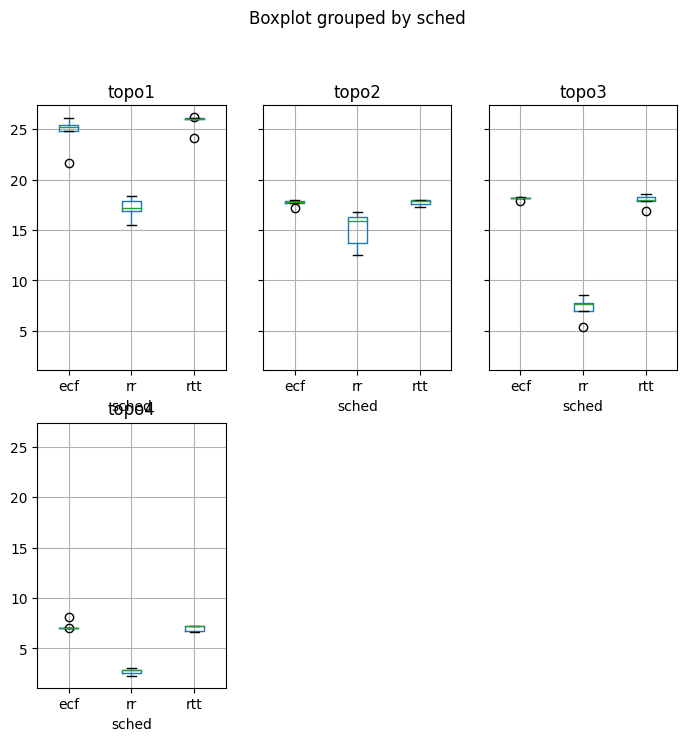

In [18]:
downloads.groupby("topo").boxplot(by="sched", figsize=(8,12), layout=(3,3), column="mbps")
